## Problem

Loan Decision for Borrower

## About

Build a predictive model that borrowers (credit/loan seekers) can use to help make the best financial decisions. This is predicting the probability that somebody (i.e. borrower) will experience financial distress in the next two years.

This code is for identifying propablem defaulter.<br>
Data: Kaggel lone deafulter data is used<br>
Models: many models are used to get comparesion between them.<br>

<br>
#Copyright@ H2HDATA
<br>
The entire prcess occurs in seven stages-<br>
1.DATA INGESTION<br>

2.DATA ANALYSIS <br>

3.DATA MUNGING<br>

4.DATA EXPLORATION<br>

5.DATA MODELING<br>

6.YPER-PARAMETERS OPTIMIZATION<br>

7.PREDICTION<br>

8.VISUAL ANALYSIS<br>

9.RESULTS<br>



In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import helper
import model


# Data Description<br> 
<br>
	target:SeriousDlqin2yrs: Person experienced 90 days past due delinquency or worse  <br>
	value: Y/N<br>
<br>
	features:
	RevolvingUtilizationOfUnsecuredLines :Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits		<br>
	age		: Age of borrower in years<br>
	NumberOfTime30-59DaysPastDueNotWorse	: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.<br>
	DebtRatio	Monthly debt payments, alimony,living costs divided by monthy gross income <br>
	MonthlyIncome :	Monthly income<br>
	NumberOfOpenCreditLinesAndLoans	: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)<br>
	NumberOfTimes90DaysLate	: Number of times borrower has been 90 days or more past due.<br>
	NumberRealEstateLoansOrLines	: Number of mortgage and real estate loans including home equity lines of credit<br>
	NumberOfTime60-89DaysPastDueNotWorse	:Number of times borrower has been 60-89 days past due but no worse in the last 2 years.<br>
	NumberOfDependents	: Number of dependents in family excluding themselves (spouse, children etc.)<br>

In [2]:
def read_data():
	'''
	return pandas data frame
	'''
	data = pd.read_csv('../Data/cs1-training.csv')
	return data


In [3]:
data =read_data()

In [4]:
data.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


  DATA ANALYSIS
-----------------

 Here,  data is  analysed and visualised to look for patterns 
 and   anamolies   using   graphs.  bar  graphs,   histograms,  
 scatter plots, etc. will be used

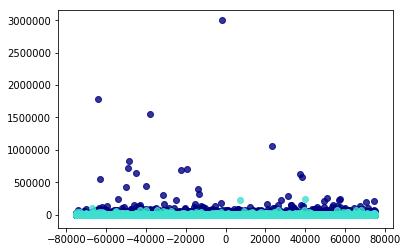

In [5]:
helper._data(data = data)

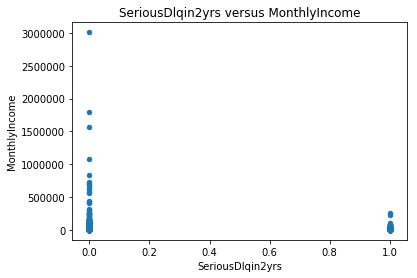

In [6]:
helper._scatter_plot(data,'SeriousDlqin2yrs','MonthlyIncome')

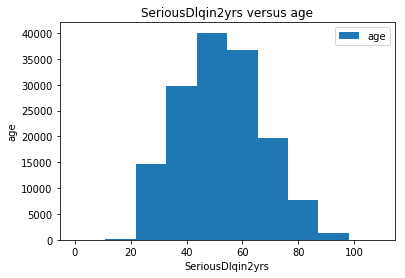

In [7]:
helper._histogram_plot(data,'SeriousDlqin2yrs','age')

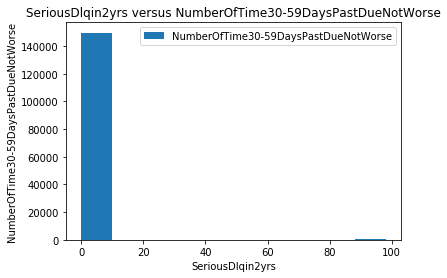

In [8]:
helper._histogram_plot(data,'SeriousDlqin2yrs','NumberOfTime30-59DaysPastDueNotWorse')

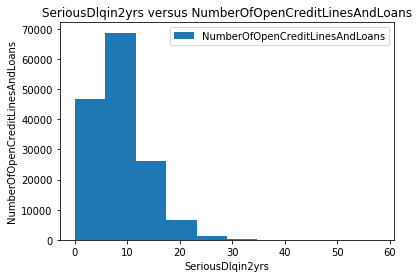

In [9]:
helper._histogram_plot(data,'SeriousDlqin2yrs','NumberOfOpenCreditLinesAndLoans')

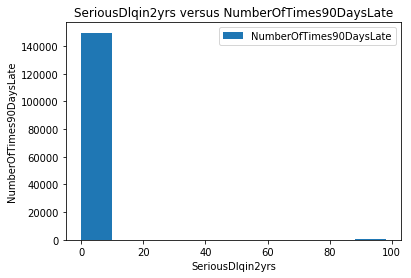

In [10]:
helper._histogram_plot(data,'SeriousDlqin2yrs','NumberOfTimes90DaysLate')

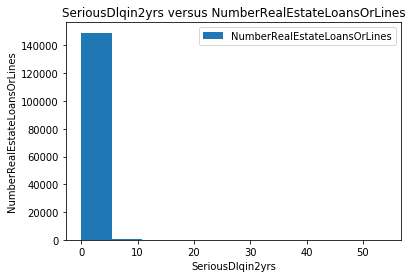

In [11]:
helper._histogram_plot(data,'SeriousDlqin2yrs','NumberRealEstateLoansOrLines')

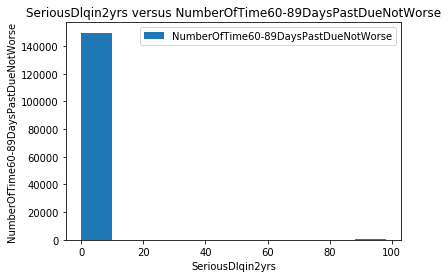

In [12]:
helper._histogram_plot(data,'SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse')

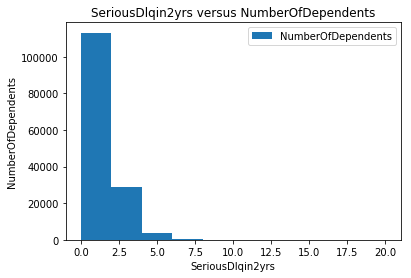

In [13]:
helper._histogram_plot(data,'SeriousDlqin2yrs','NumberOfDependents')

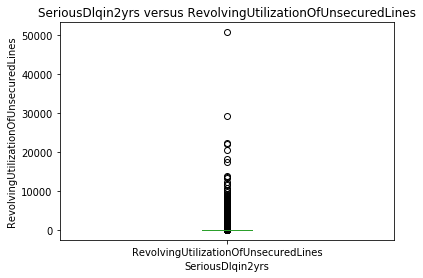

In [14]:
helper._box_plot(data,'SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines')

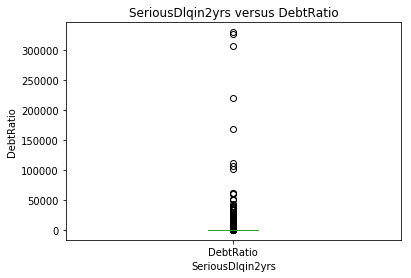

In [15]:
helper._box_plot(data,'SeriousDlqin2yrs','DebtRatio')

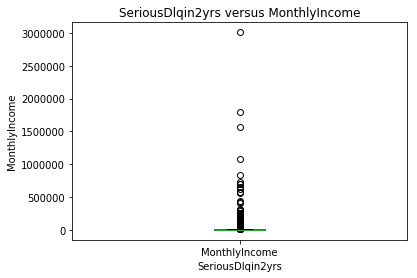

In [16]:
helper._box_plot(data,'SeriousDlqin2yrs','MonthlyIncome')

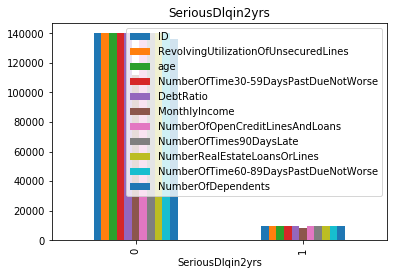

In [17]:
helper._bar_chart(data,'SeriousDlqin2yrs')

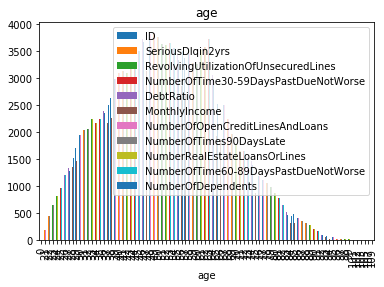

In [18]:
helper._bar_chart(data,'age')

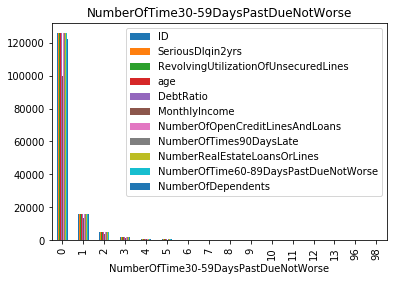

In [19]:
helper._bar_chart(data,'NumberOfTime30-59DaysPastDueNotWorse')

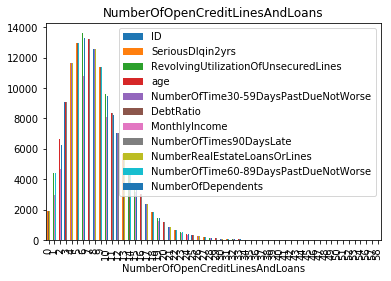

In [20]:
helper._bar_chart(data,'NumberOfOpenCreditLinesAndLoans')

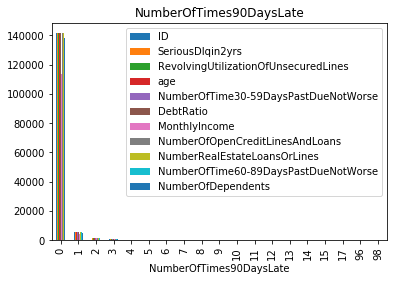

In [21]:
helper._bar_chart(data,'NumberOfTimes90DaysLate')

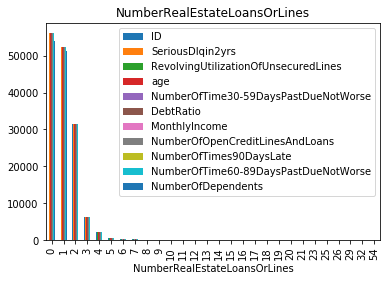

In [22]:
helper._bar_chart(data,'NumberRealEstateLoansOrLines')

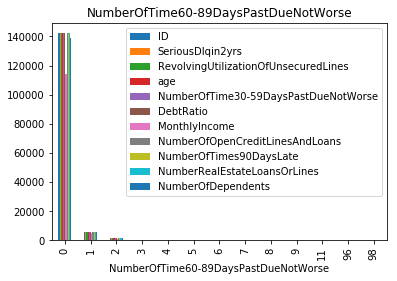

In [23]:
helper._bar_chart(data,'NumberOfTime60-89DaysPastDueNotWorse')

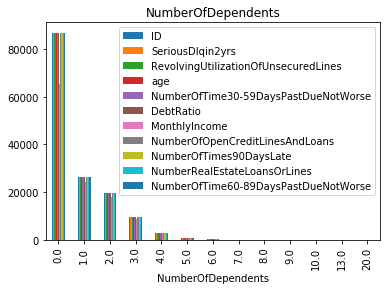

In [24]:
helper._bar_chart(data,'NumberOfDependents')

From above plot we can see large data imbalance and also presence of outlier in our data

# Data  Exploration

1. Missing value treatment<br>
2. Outlier treatment<br>
3. Data imbalance treatment

In [27]:
def prepocessing(data):
	"""
	returns feature and target after doing following stpes:
	1. misssing value imputation
	2. outlier treatment
	3. balancing data
	"""
	ID = data['ID']
	data = data.drop(['ID'],axis =1)
	data = helper.fill_missing(data,0)
	data = helper.treat_outlier(data)
	features,target = helper.oversampling(data)
	return features,target	


In [28]:
features,target = prepocessing(data)

In [31]:
print features[0]

[2.33809776e-01 3.00000000e+01 7.97960908e+00 3.60496820e-02
 3.30000000e+03 5.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


## Modeling 

In [30]:

def training(features,target):
	"""
	fit to model also apply hyperparameter optimization
	"""
	test_data = pd.read_csv('../Data/cs1-test.csv')
	test_data = test_data.drop(['SeriousDlqin2yrs','ID'],axis =1)
	test_data = test_data.dropna()
    
	model.fit_algo(features,target,test_data = test_data)
	model.fit_algo_random(features,target)
    

In [32]:
print 'training'

training


In [12]:
training(features,target)

[0.81257225, 0.81140048, 0.81460271] 	logistic
[0.92870145, 0.92556471, 0.92541855] 	svm
[0.71529743, 0.54807335, 0.63263354] 	mlp
[0.89119199, 0.93801488, 0.94214722] 	GBM
	 	 	 f1 score 	 	 	
[0.82924172, 0.82745375, 0.83038135] 	 logistc
[0.9347059, 0.93159617, 0.9314811] 	svm
[0.75437096, 0.84032258, 0.74350274] 	mlp
[0.89266381, 0.94305211, 0.94655833] 	GBM
	 	 	 roc_auc 	 	 	
[0.89804437, 0.89856208, 0.9014922] 	 logistc
[0.96799027, 0.96672465, 0.96732501] 	svm
[0.89877777, 0.59556701, 0.8660613] 	mlp
[0.96282017, 0.98363341, 0.98440272] 	GBM
	logistic	0.832826641916
logistic	{'penalty': 'l1', 'C': 30.10127353405051, 'fit_intercept': True}
	GBM	0.952003507078
GBM	{'max_features': 'auto', 'learning_rate': 0.3945925710914654, 'max_depth': 8}
			f1 score			
	logistic	0.832826641916
logistic	{'penalty': 'l1', 'C': 46.226359596839714, 'fit_intercept': True}
	GBM	0.962003507419
GBM	{'max_features': 'auto', 'learning_rate': 0.3945925710914654, 'max_depth': 8}
 


## Analysis

From result we can see that best model was given by GBM although SVM result was lose to GBM but  as SVM took more time then GBM and gave good score and GBM performed best with random search too.